<font color='blue' size="+3">SMOTE-SVM vs ADASYN-SVM</font>


In [48]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, recall_score, fbeta_score, precision_recall_curve,
    precision_score, f1_score, matthews_corrcoef, confusion_matrix
)

# Suppress warnings
warnings.filterwarnings("ignore")

# Enable inline plotting for Jupyter Notebooks
%matplotlib inline


In [49]:
# read the data file
df= pd.read_csv('diabetes.csv')

# Exploratory Data Analysis

We need to explore/clean/filter it before processing it for machine learning It involves adding/deleting few columns or rows, joining some other data, and handling qualitative variables like dates.

In [50]:
df.shape

(768, 9)

In [51]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
df.describe()
df.shape

(768, 9)

In [53]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [54]:
df.isnull().sum()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [55]:
# remove rows with missing value
df = df.dropna()

In [56]:
# check data duplicates
df.duplicated().sum()

0

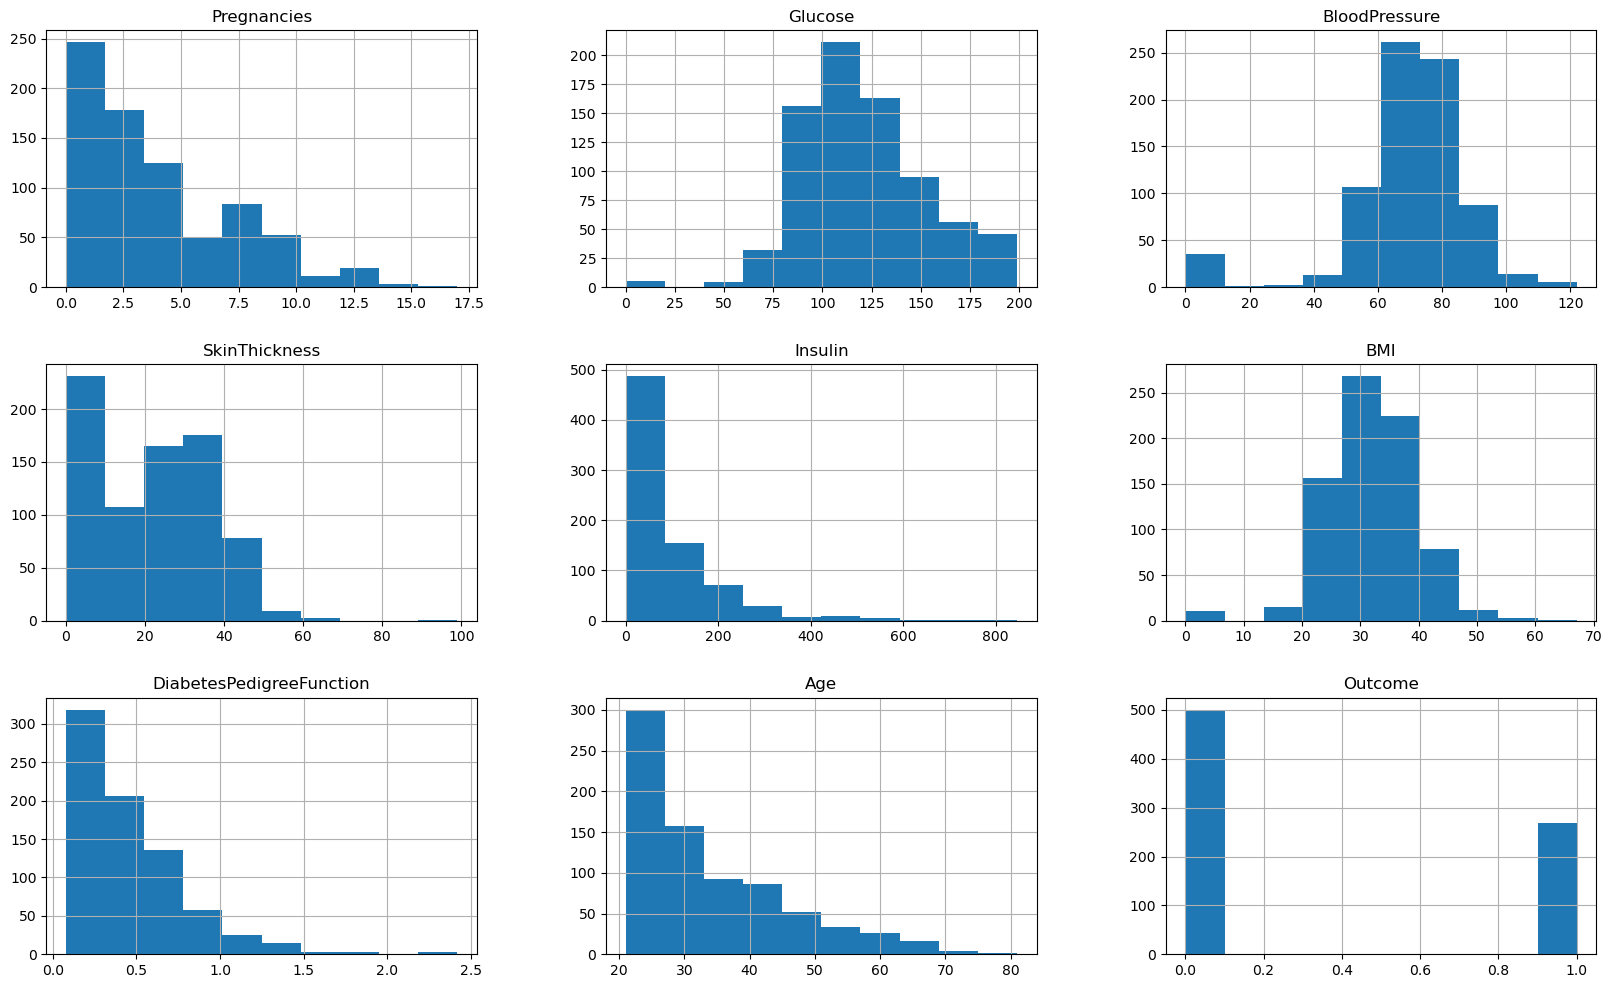

In [57]:

df.hist(figsize=(20, 12))
plt.show()

# Target Variable (Response)

In [58]:
print(df['Outcome'].unique())


[1 0]


<Axes: xlabel='Outcome', ylabel='count'>

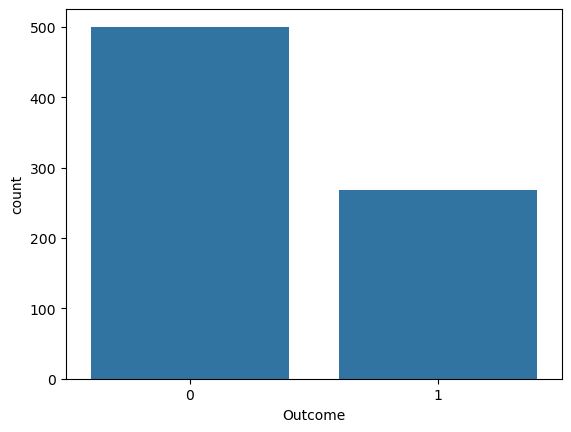

In [59]:
sns.countplot(x=df['Outcome'])

In [60]:
df = pd.get_dummies(df, drop_first=True)

print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


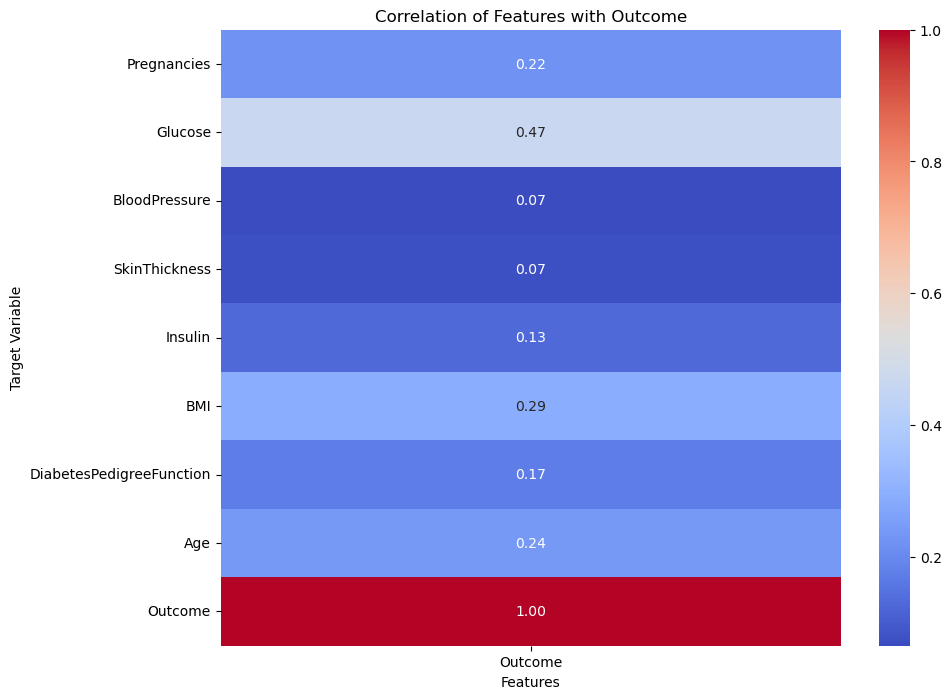

In [61]:
corr_matrix = df.corr()

target_corr = corr_matrix['Outcome']

plt.figure(figsize=(10, 8))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Features with Outcome')
plt.xlabel('Features')
plt.ylabel('Target Variable')
plt.show()


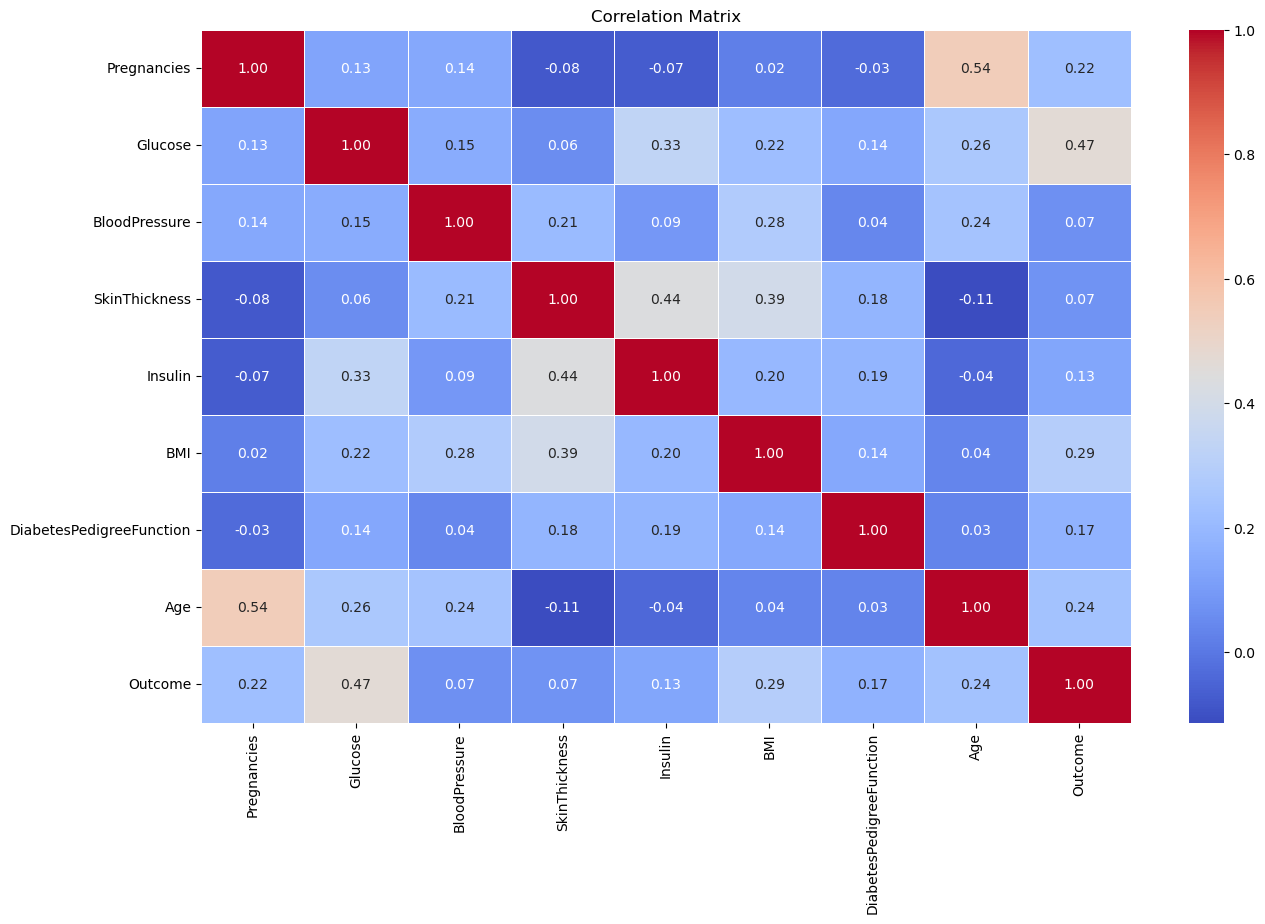

In [62]:
# Create the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 9))

# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Matrix')

# Show plot
plt.show()

In [63]:
# Choose a subset of variables
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']
# Split the data into training and testing sets (70% training then 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
#Print
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (537, 8)
X_test: (231, 8)
y_train: (537,)
y_test: (231,)


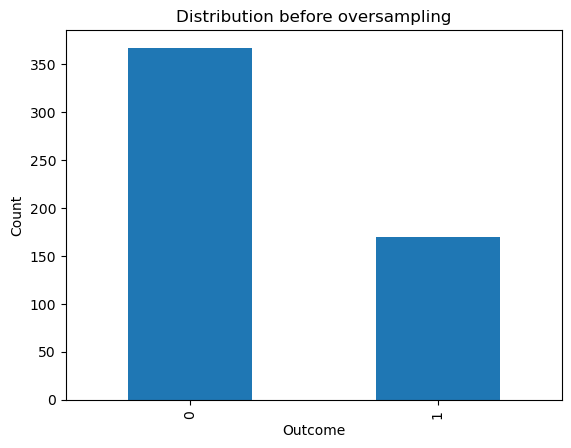

In [64]:
# show the train distribution
y_train.value_counts().plot(kind='bar', title='Distribution before oversampling')
plt.ylabel('Count')
plt.show()

# Oversampling SMOTE

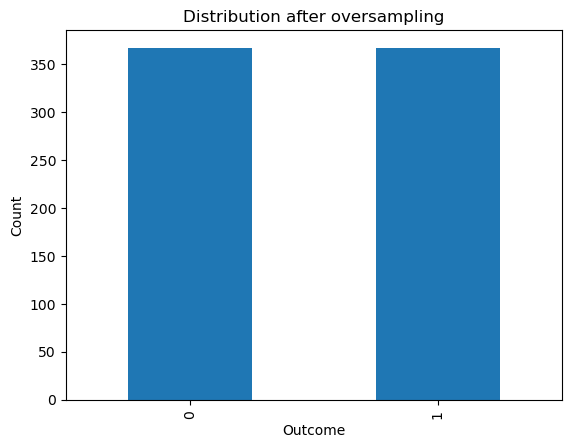

In [65]:


# Apply oversampling for data training
smote = SMOTE(sampling_strategy='minority')
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

# Show the distribution of the outcome after oversampling
y_train_SMOTE.value_counts().plot(kind='bar', title='Distribution after oversampling')
plt.ylabel('Count')
plt.show()


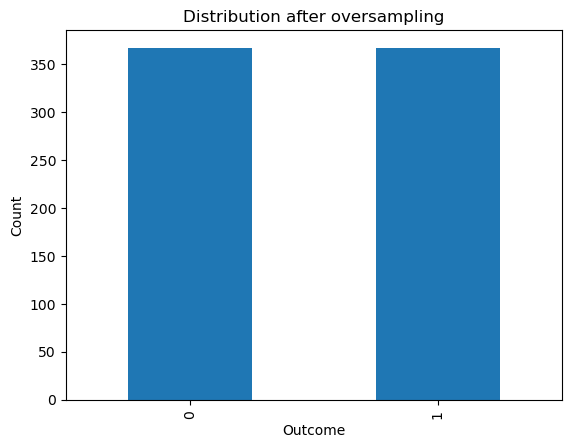

In [66]:


blsmote = BorderlineSMOTE(sampling_strategy='minority', kind='borderline-1')
X_train_blsmote, y_train_blsmote = blsmote.fit_resample(X_train, y_train)

# Show the distribution of the outcome after oversampling
y_train_blsmote.value_counts().plot(kind='bar', title='Distribution after oversampling')
plt.ylabel('Count')
plt.show()

# Oversampling ADASYN

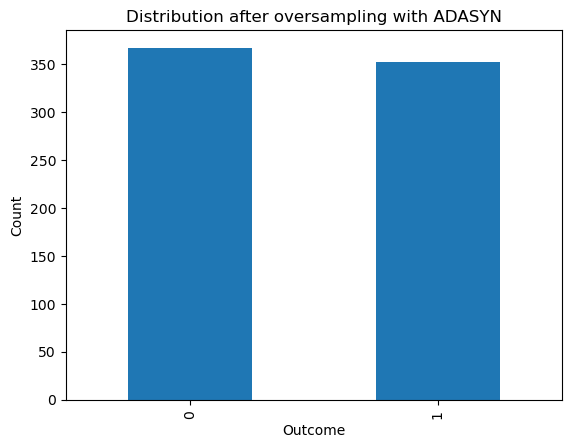

In [67]:


# X_train_ADASYN, y_train_ADASYN = ADASYN().fit_resample(X_train, y_train)

# # Apply oversampling for data training
adasyn = ADASYN(sampling_strategy='minority')
X_train_ADASYN, y_train_ADASYN = adasyn.fit_resample(X_train, y_train)

# Show the distribution of the outcome after oversampling
y_train_ADASYN.value_counts().plot(kind='bar', title='Distribution after oversampling with ADASYN')
plt.ylabel('Count')
plt.show()

# Training with SVM

Training Support Vector machine on Original...


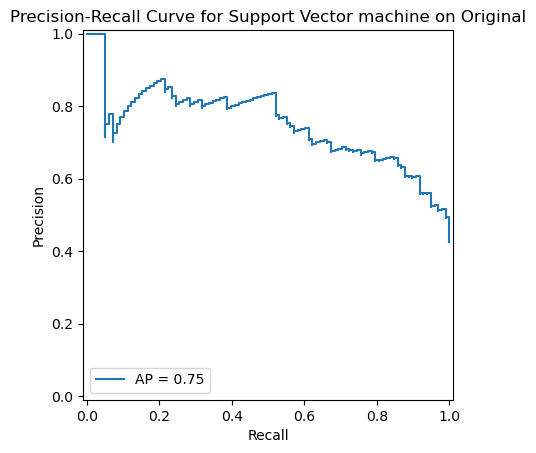

Training Support Vector machine on SMOTE...


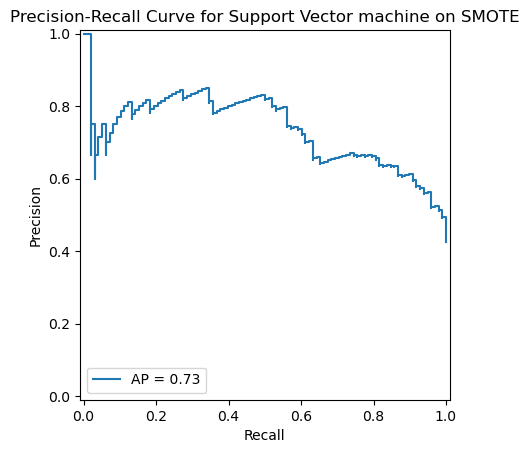

Training Support Vector machine on ADASYN...


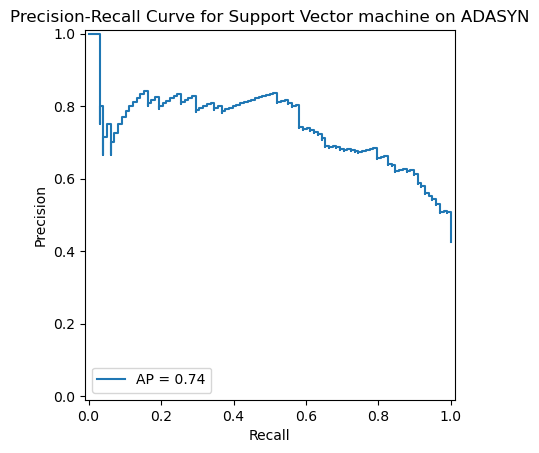

                    Model   Dataset  Accuracy  Balanced Accuracy  Sensitivity  \
0  Support Vector machine  Original  0.735931           0.711600     0.551020   
1  Support Vector machine     SMOTE  0.731602           0.732009     0.734694   
2  Support Vector machine    ADASYN  0.748918           0.755102     0.795918   

   Specificity  F-Beta Score       MCC  Precision  Geometric Mean  
0     0.872180      0.731862  0.453311   0.760563        0.693245  
1     0.729323      0.734953  0.459630   0.666667        0.732004  
2     0.714286      0.755592  0.504318   0.672414        0.753998  


In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, 
    balanced_accuracy_score, 
    precision_score, 
    recall_score, 
    fbeta_score, 
    matthews_corrcoef, 
    confusion_matrix,
    PrecisionRecallDisplay,
    average_precision_score,
    roc_auc_score,
    precision_recall_curve
)

# Define models
models = {
    'Support Vector machine': SVC(C=1.0, kernel="linear", degree=2, gamma='auto'),
    # 'Support Vector machine': SVC(probability=True),
}

# Define datasets
datasets = {
    'Original': (X_train, y_train),
    'SMOTE': (X_train_SMOTE, y_train_SMOTE),
    # 'blsmote': (X_train_blsmote, y_train_blsmote),
    'ADASYN': (X_train_ADASYN, y_train_ADASYN),
}

# Initialize results list
results = []

# Train and evaluate models for each dataset
for dataset_name, (X_train_set, y_train_set) in datasets.items():
    for name, model in models.items():
        print(f"Training {name} on {dataset_name}...")

        # Train the model
        model.fit(X_train_set, y_train_set)
        y_pred = model.predict(X_test)
        y_pred_prob = model.decision_function(X_test) if hasattr(model, "decision_function") else model.predict_proba(X_test)[:, 1]

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        balanced_acc = balanced_accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        sensitivity = recall_score(y_test, y_pred)  # Recall is the same as Sensitivity
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn + fp)  # Specificity = TN / (TN + FP)
        f1 = fbeta_score(y_test, y_pred, average='weighted', beta=0.5)
        mcc = matthews_corrcoef(y_test, y_pred)

        # Calculate Geometric Mean (G-Mean)
        gmean = np.sqrt(sensitivity * specificity)

        # Append metrics to results
        results.append({
            'Model': name,
            'Dataset': dataset_name,
            'Accuracy': accuracy,
            'Balanced Accuracy': balanced_acc,
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'F-Beta Score': f1,
            'MCC': mcc,
            'Precision': precision,
            'Geometric Mean': gmean
        })

        # Precision-Recall curve plotting
        precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_prob)
        average_precision = average_precision_score(y_test, y_pred_prob)

        # Plot Precision-Recall curve
        disp = PrecisionRecallDisplay(precision=precision_vals, recall=recall_vals, average_precision=average_precision)
        disp.plot()
        plt.title(f"Precision-Recall Curve for {name} on {dataset_name}")
        plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


# Confusion Matrix

Training Support Vector machine on Original...


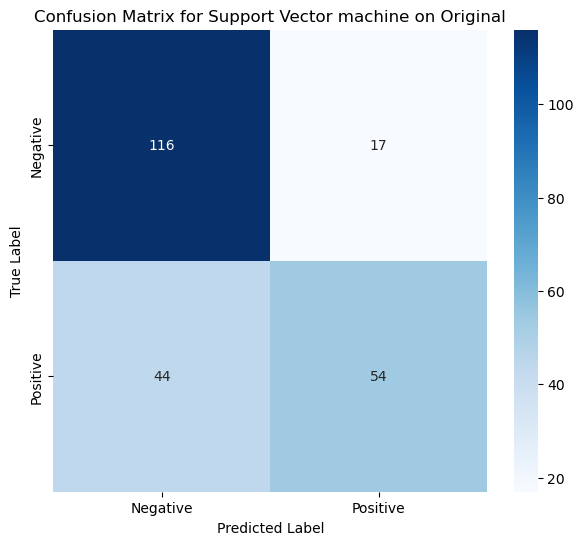

Training Support Vector machine on SMOTE...


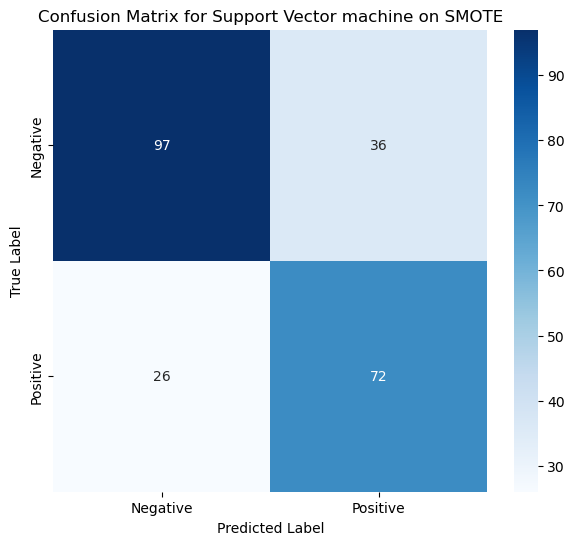

Training Support Vector machine on blsmote...


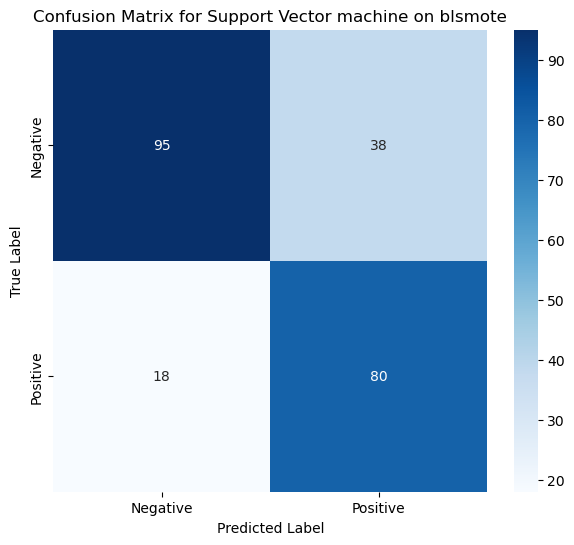

Training Support Vector machine on ADASYN...


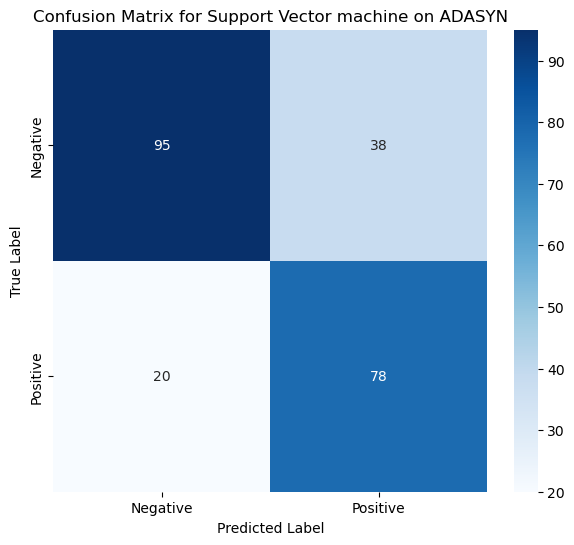

                    Model   Dataset  Accuracy  Balanced Accuracy  Sensitivity  \
0  Support Vector machine  Original  0.735931           0.711600     0.551020   
1  Support Vector machine     SMOTE  0.731602           0.732009     0.734694   
2  Support Vector machine   blsmote  0.757576           0.765306     0.816327   
3  Support Vector machine    ADASYN  0.748918           0.755102     0.795918   

   Specificity  F1-Beta Score       MCC  Precision  
0     0.872180       0.731862  0.453311   0.760563  
1     0.729323       0.734953  0.459630   0.666667  
2     0.714286       0.765209  0.524609   0.677966  
3     0.714286       0.755592  0.504318   0.672414  


In [ ]:
model_svc = SVC(C=1.0, kernel="linear", degree=2, gamma='auto')

# Define models
models = {
    'Support Vector machine': model_svc,
}

# Define datasets
datasets = {
    'Original': (X_train, y_train),
    'SMOTE': (X_train_SMOTE, y_train_SMOTE),
    # 'blsmote': (X_train_blsmote, y_train_blsmote),
    'ADASYN': (X_train_ADASYN, y_train_ADASYN),
}

# Initialize results list
results = []

# Train and evaluate models for each dataset
for dataset_name, (X_train_set, y_train_set) in datasets.items():
    for name, model in models.items():
        print(f"Training {name} on {dataset_name}...")

        # Train the model
        model.fit(X_train_set, y_train_set)
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        balanced_acc = balanced_accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        sensitivity = recall_score(y_test, y_pred)  # Recall is the same as Sensitivity
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn + fp)  # Specificity = TN / (TN + FP)
        f1 = fbeta_score(y_test, y_pred, average='weighted', beta=0.5)
        mcc = matthews_corrcoef(y_test, y_pred)

        # Append metrics to results
        results.append({
            'Model': name,
            'Dataset': dataset_name,
            'Accuracy': accuracy,
            'Balanced Accuracy': balanced_acc,
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'F1-Beta Score': f1,
            'MCC': mcc,
            'Precision': precision
        })

        # Generate confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Plot the confusion matrix using seaborn's heatmap
        plt.figure(figsize=(7, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
        plt.title(f"Confusion Matrix for {name} on {dataset_name}")
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)



In [70]:
model_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 2,
 'gamma': 'auto',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [71]:
# from sklearn.model_selection import GridSearchCV
# svm = SVC()
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf', 'linear']}
# grid = GridSearchCV(svm, param_grid)

# grid.fit(X_train,y_train)

In [72]:
# from sklearn.model_selection import GridSearchCV
# svm = SVC()
# param_grid = {'C': [0.1, 1, 10], 
#               'gamma':[1, 0.1, 0.01],
#               'kernel': ['rbf', 'linear']}
# grid = GridSearchCV(svm, param_grid)

# grid.fit(X_train,y_train)